In [47]:
%matplotlib inline
from bs4 import BeautifulSoup
import requests
import pandas as pd

# Notes on gas prices

1. Gather data for nominal price of gas standardize on yearly price
2. cleaning and transforming
3. adjust prices for inflation
4. graph the nominal and adjusted prices
5. choose some other item with historical prices to compare to gas.

The beautiful soup functions and attributes we will use in this exercise include:

* xxx.find_all('some tag')   -- this gives us a list of matching tags
* xxx.contents  -- gives us the contents of a particular match -- also a list


The first thing we need to do is get the text of the web page and have BeautifulSoup parse it for us.

In [54]:
r = requests.get("http://www.eia.gov/totalenergy/data/annual/showtext.cfm?t=ptb0524")
soup = BeautifulSoup(r.text, "lxml")

In [55]:
print(soup.prettify())[0:10]

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="en-us" http-equiv="Content-Language"/>
  <meta content="all" name="robots"/>
  <meta content="EIA - Energy Information Administration" name="agency"/>
  <meta content="official energy statistics, data, analysis and forecasting" name="subject"/>
  <meta content="Energy Information Administration - EIA - Official Energy Statistics from the U.S. Government" name="Description"/>
  <link href="/global/styles/screen.css" media="screen, projection" rel="stylesheet" type="text/css"/>
  <link href="/global/scripts/jquery/datepicker/jquery-ui-dp.custom.css" rel="stylesheet" type="text/css"/>
  <link href="/global/styles/EIA_global.css" media="screen, projecti

TypeError: 'NoneType' object is not subscriptable

#### Start by finding all of the table rows in the document

In [15]:
allrows = soup.find_all("tr")

In [16]:
allrows

[<tr><td colspan="13" style="border:1;">Table 5.24  Retail Motor Gasoline and On-Highway Diesel Fuel Prices, 1949-2011<br/>                       (Dollars per Gallon)</td></tr>,
 <tr><td colspan="1" rowspan="3"><br/><br/><br/><br/><br/>Year</td>
 <td colspan="8" rowspan="1">Motor Gasoline by Grade</td>
 <td colspan="3" rowspan="1">Regular Motor Gasoline by Area Type</td>
 <td colspan="1" rowspan="2"><br/><br/>On-Highway<br/>Diesel Fuel </td>
 </tr>,
 <tr>
 <td colspan="2" rowspan="1"><br/>Leaded Regular </td>
 <td colspan="2" rowspan="1"><br/>Unleaded Regular</td>
 <td colspan="2" rowspan="1"><br/>Unleaded Premium</td>
 <td colspan="2" rowspan="1"><br/>All  Grades</td>
 <td colspan="1" rowspan="1">Conventional<br/>Gasoline Areas <sup>1</sup><sup>,2</sup></td>
 <td colspan="1" rowspan="1">Reformulated<br/>Gasoline Areas <sup>3</sup><sup>,4</sup></td>
 <td colspan="1" rowspan="1"><br/>All Areas</td>
 </tr>,
 <tr>
 <td colspan="1" rowspan="1">Nominal <sup>5</sup></td>
 <td colspan="1" row

# Format of our output:

The result will be a dictionary with two keys **year** and **price**

```
{ 'year': [1949, 1950, ... ], 'price': [.28, .32, ....] }
```

### Look at the format of one row

In [11]:
allrows[4]

<tr>
<td colspan="1">1949</td>
<td colspan="1">
0.268</td>
<td colspan="1">
<sup>R </sup>1.848</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
</tr>

### We can get all the cells for one row by using find_all again using the current row as the starting point.  And searching on on the td tag.

* Now we notice that the year is always in column 0
* prior to 1990 the price we want is in column 1 otherwise column 3
* After getting some errors on differnt columns I noticed that some columns have the weird superscript characters, they always come before the price.  So the price is always the last thing in the contents list.  hence the indexing by -1

In [21]:
onerow = allrows[4].find_all('td')

In [51]:
rawdata = {'year':[], 'price':[]}
allrows = soup.find_all("tr")
for row in allrows[4:4+2011-1949+1]:
    el = row.find_all('td')
    year = el[0].contents[0]
    if year < '1990':
        price = el[1].contents[-1]
    else:
        price = el[3].contents[-1]
    try:
       iyear = int(year.strip())
    except:
       print("bad data for year", year)
    try:
       fprice = float(price.strip())
    except:
       print("bad data for price", price)

    rawdata['year'].append(iyear)
    rawdata['price'].append(fprice)


In [52]:
rawdata

{'price': [0.268,
  0.268,
  0.272,
  0.274,
  0.287,
  0.29,
  0.291,
  0.299,
  0.31,
  0.304,
  0.305,
  0.311,
  0.308,
  0.306,
  0.304,
  0.304,
  0.312,
  0.321,
  0.332,
  0.337,
  0.348,
  0.357,
  0.364,
  0.361,
  0.388,
  0.532,
  0.567,
  0.59,
  0.622,
  0.627,
  0.857,
  1.191,
  1.311,
  1.222,
  1.158,
  1.129,
  1.115,
  0.857,
  0.897,
  0.9,
  0.997,
  1.164,
  1.14,
  1.127,
  1.108,
  1.112,
  1.147,
  1.231,
  1.234,
  1.059,
  1.165,
  1.51,
  1.461,
  1.358,
  1.591,
  1.88,
  2.295,
  2.589,
  2.801,
  3.266,
  2.35,
  2.788,
  3.527],
 'year': [1949,
  1950,
  1951,
  1952,
  1953,
  1954,
  1955,
  1956,
  1957,
  1958,
  1959,
  1960,
  1961,
  1962,
  1963,
  1964,
  1965,
  1966,
  1967,
  1968,
  1969,
  1970,
  1971,
  1972,
  1973,
  1974,
  1975,
  1976,
  1977,
  1978,
  1979,
  1980,
  1981,
  1982,
  1983,
  1984,
  1985,
  1986,
  1987,
  1988,
  1989,
  1990,
  1991,
  1992,
  1993,
  1994,
  1995,
  1996,
  1997,
  1998,
  1999,
  2000,
  2001,


In [45]:
df = pd.DataFrame(rawdata)
df

,price,year
0,0.268,1949
1,0.268,1950
2,0.272,1951
3,0.274,1952
4,0.287,1953
5,0.290,1954
6,0.291,1955
7,0.299,1956
8,0.310,1957
9,0.304,1958


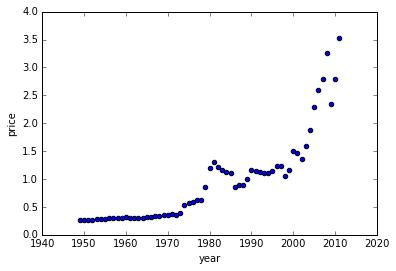

In [53]:
df.plot(x='year',y='price',kind='scatter')
